# Explore and Visualize

Since we have created a training data set, we are now ready to explore it in more detail. We can easily calculate the standard correlation coefficient between every pair of attributes to check for linear correlations:

In [1]:
# code from previous notebooks of this section
import pandas as pd
from sklearn.model_selection import train_test_split

hb_data = pd.read_csv('HB_data.csv')
train_set, test_set = train_test_split(hb_data, test_size=0.2, random_state=42)
# end code from previous notebooks of this section

# We will kick out the character data by the next line
train_set_num = train_set.drop(['atomtype-acc','atomtype-don'], axis=1)
corr_matrix = train_set_num.corr()
print(corr_matrix["energy"])

energy      1.000000
bo-acc     -0.465641
bo-donor    0.518347
q-acc       0.541708
q-donor    -0.410503
q-hatom    -0.453727
dist-dh     0.095759
dist-ah     0.134798
Name: energy, dtype: float64


The correlation coefficient ranges from –1 to 1. A value close to 1 or -1 refers to a good linear correlation.

A more detailed information can be obtained by a scatter plot from the pandas library.

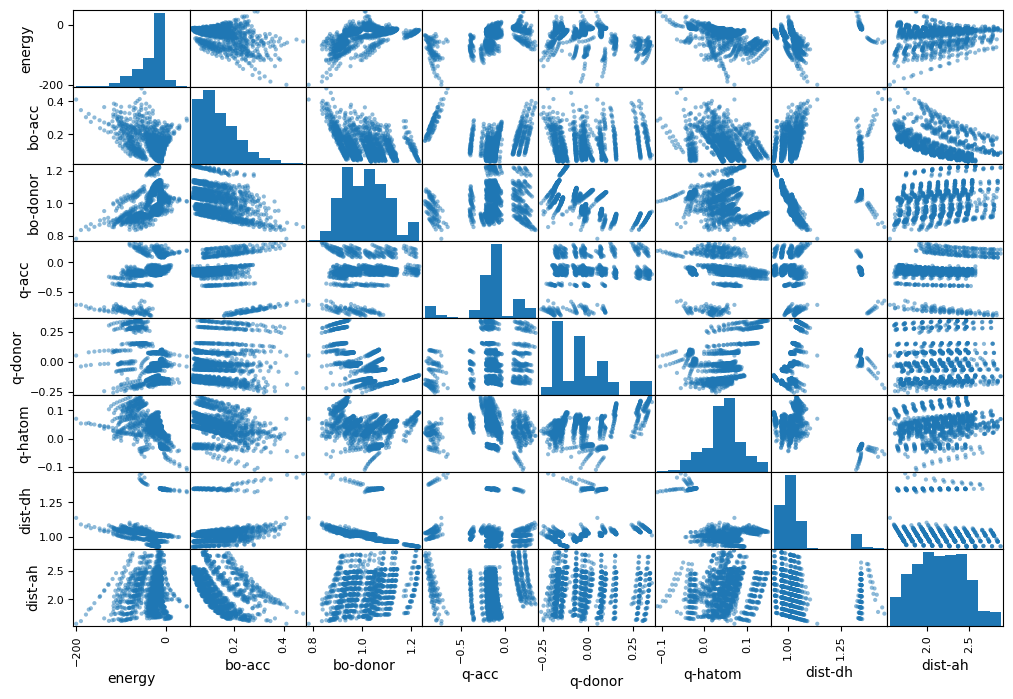

In [2]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

attributes = ["energy", "bo-acc", "bo-donor", "q-acc", "q-donor", "q-hatom", "dist-dh", "dist-ah"]
scatter_matrix(train_set[attributes], figsize=(12, 8))
plt.show()

Histograms are plotted on the diagonal axis while the other subplots are the respective data plots. We do not see a simple correlation for the energy. However, we see some regions in the other subplots, for example q-acc vs. bo-acc. These might come from the atom types. To check this, we transform the element types to numbers first and make a plot on 3 variables (q-acc, bo-acc, atomtype-acc) subsequently: 

In [3]:
from sklearn.preprocessing import OrdinalEncoder

atomtype_acc_c = train_set[["atomtype-acc"]]

# The ordinal encoder will be explained in more detail later.
ordinal_encoder = OrdinalEncoder()
atomtype_acc_num = ordinal_encoder.fit_transform(atomtype_acc_c)

print("First five instances before transformation:")
print(atomtype_acc_c[:5])
print("\nFirst five instances after transformation:")
print(atomtype_acc_num[:5])

First five instances before transformation:
     atomtype-acc
63              S
1316            O
1018            S
1046            O
1149            O

First five instances after transformation:
[[4.]
 [3.]
 [4.]
 [3.]
 [3.]]


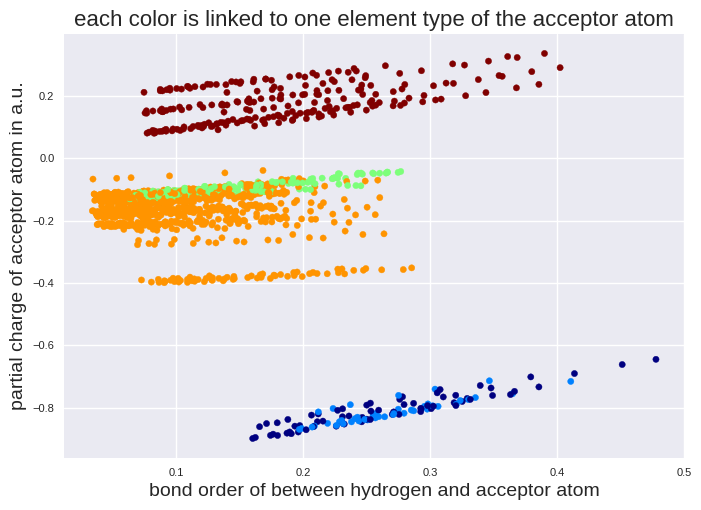

In [4]:
import matplotlib.pyplot as plt

# We will use here a special style to get a nice plot.
plt.style.use('seaborn-v0_8')

plt.scatter(train_set["bo-acc"], train_set["q-acc"], c=atomtype_acc_num, cmap=plt.cm.jet, s=20)
plt.title("each color is linked to one element type of the acceptor atom", fontsize=16)
plt.xlabel("bond order of between hydrogen and acceptor atom", fontsize=14)
plt.ylabel("partial charge of acceptor atom in a.u.", fontsize=14)
plt.tick_params(labelsize=8)

plt.show()

We check if we see a similar behavior for the energy.

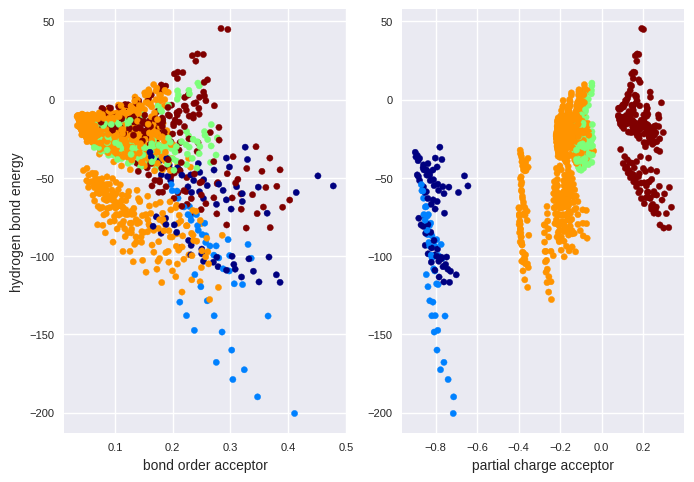

In [5]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(train_set["bo-acc"], train_set["energy"], c=atomtype_acc_num, cmap=plt.cm.jet, s=20)
ax[0].set_xlabel("bond order acceptor", fontsize=10)
ax[0].set_ylabel("hydrogen bond energy", fontsize=10)
ax[0].tick_params(labelsize=8)

ax[1].scatter(train_set["q-acc"], train_set["energy"], c=atomtype_acc_num, cmap=plt.cm.jet, s=20)
ax[1].set_xlabel("partial charge acceptor", fontsize=10)
ax[1].tick_params(labelsize=8)

plt.show()

There are regions where selected element types are strongly located. Thus, it seems reasonable to include element types in the regression model.

# Exercise

Your task is to develop a model which predicts the price of a house in California. You have a data set from the 1990 U.S. census for this task which is also available in scikit-learn. The price in the data set is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000). MedInc is the median income in a block group. A block group is represented by a population of 600 to 3000 people. Also the house age is normalized per block group. More details on the full data set can be found here: <a href="https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html"> </a> 

We have created a csv file with selected entries. You can found it in the same directory as this notebook and is called "housing_data.csv". Within this exercise, open the file "housing_data.csv", check which input features are provided, make a test set and check which feature shows the strongest simple linear correlation to the prize in the training data set. Check also, if some features are imbalanced by plotting a histogram.  

In [1]:
# Your code here